# Long Short-Term Memory (LSTM)

LSTM (Long Short-Term Memory) is a type of recurrent neural network (RNN) architecture designed to address the vanishing gradient problem that can occur when training traditional RNNs. It is particularly effective for modeling sequential data, where each element in the sequence depends on previous elements.

In [1]:
import pandas as pd
train_file = r"C:\Users\BHARGAVI\Downloads\project_data\ghc_train.csv"
test_file = r"C:\Users\BHARGAVI\Downloads\project_data\ghc_test.csv"

# Load CSV files into pandas DataFrames
train_df = pd.read_csv(train_file)
test_df=pd.read_csv(test_file)

# Preprocessing and Tokenizing for DL Models

In [2]:
import pandas as pd

# Function to map original labels to binary values
def map_labels(df):
    label_mapping = {'__label__0': 0, '__label__1': 1}
    if 'label' in df.columns:
        df['label'] = df['label'].map(label_mapping)
    return df

# Function to ensure text column is string type and handle missing values
def preprocess_text_column(df):
    df['text'] = df['text'].fillna('').astype(str)
    return df
    
# Apply functions to preprocess train_df and test_df
train_df = map_labels(train_df)
test_df = map_labels(test_df)

train_df = preprocess_text_column(train_df)
test_df = preprocess_text_column(test_df)


In [3]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Function to tokenize text data
def tokenize_texts(train_texts, test_texts, num_words=None):
    # Convert all values to strings to ensure tokenizer compatibility
    train_texts = [str(text) for text in train_texts]
    test_texts = [str(text) for text in test_texts]
    
    tokenizer = Tokenizer(num_words=num_words)
    tokenizer.fit_on_texts(train_texts)
    
    X_train_seq = tokenizer.texts_to_sequences(train_texts)
    X_test_seq = tokenizer.texts_to_sequences(test_texts)
    
    return tokenizer, X_train_seq, X_test_seq

# Function to pad sequences
def pad_sequences_data(X_train_seq, X_test_seq, max_sequence_length):
    X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
    X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)
    return X_train_padded, X_test_padded

# Function to extract labels
def extract_labels(train_data, test_data):
    y_train = train_data['label'].values
    y_test = test_data['label'].values
    return y_train, y_test

tokenizer, X_train_seq, X_test_seq = tokenize_texts(train_df['text'], test_df['text'], num_words=5000)
X_train_padded, X_test_padded = pad_sequences_data(X_train_seq, X_test_seq, max_sequence_length=100)
y_train, y_test = extract_labels(train_df, test_df)


# One LSTM Layer with 100 Neurons

Epoch 1/5


C:\Users\BHARGAVI\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


477/477 ━━━━━━━━━━━━━━━━━━━━ 115s 233ms/step - accuracy: 0.6929 - loss: 0.5586 - val_accuracy: 0.8191 - val_loss: 0.4436
Epoch 2/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 117s 245ms/step - accuracy: 0.9009 - loss: 0.2678 - val_accuracy: 0.8072 - val_loss: 0.5131
Epoch 3/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 116s 244ms/step - accuracy: 0.9347 - loss: 0.1866 - val_accuracy: 0.8180 - val_loss: 0.5341
Epoch 4/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 122s 255ms/step - accuracy: 0.9553 - loss: 0.1309 - val_accuracy: 0.8531 - val_loss: 0.5536
Epoch 5/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 115s 241ms/step - accuracy: 0.9681 - loss: 0.0974 - val_accuracy: 0.8278 - val_loss: 0.6449
173/173 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.8260 - loss: 0.4458
173/173 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step
LSTM Model Classification Report with Adjusted Threshold:
               precision    recall  f1-score   support

     Class 0       0.95      0.77      0.85      4803
     Class 1       0.32      0.72      0.44       707

    accuracy 

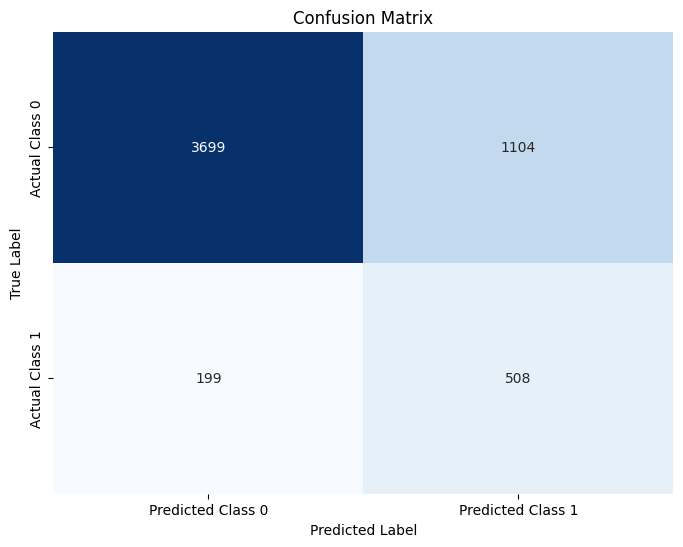

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Load datasets
train_df = pd.read_csv(r"C:\Users\BHARGAVI\Downloads\project_data\ghc_train.csv")
test_df = pd.read_csv(r"C:\Users\BHARGAVI\Downloads\project_data\ghc_test.csv")

# Replace NaN values with empty strings
train_df['text'] = train_df['text'].fillna('')
test_df['text'] = test_df['text'].fillna('')

# Extract texts and labels
X = train_df['text'].values.astype(str)
y = train_df['label'].values

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize texts
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(test_df['text'].values.astype(str))

# Pad sequences
max_len = 100  # Maximum sequence length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_val_padded = pad_sequences(X_val_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Apply Random Oversampling to balance the training data
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_padded, y_train)

# Define LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_len))
lstm_model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with oversampled data
history = lstm_model.fit(X_train_resampled, y_train_resampled, epochs=5, batch_size=64,
                         validation_data=(X_val_padded, y_val),
                         callbacks=[early_stopping])

# Evaluate LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_padded, test_df['label'].values)
lstm_y_pred = lstm_model.predict(X_test_padded)
lstm_y_pred_classes = (lstm_y_pred > 0.5).astype(int).flatten()

# Adjust threshold for classification to reduce false negatives
threshold = 0.3
lstm_y_pred_classes_adjusted = (lstm_y_pred > threshold).astype(int).flatten()

# Print classification report
lstm_report = classification_report(test_df['label'].values, lstm_y_pred_classes_adjusted, target_names=['Class 0', 'Class 1'])
print("LSTM Model Classification Report with Adjusted Threshold:\n", lstm_report)

# Print confusion matrix
lstm_conf_matrix = confusion_matrix(test_df['label'].values, lstm_y_pred_classes_adjusted)
print("Confusion Matrix:\n", lstm_conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(lstm_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Class 0', 'Predicted Class 1'],
            yticklabels=['Actual Class 0', 'Actual Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# One LSTM Layer with 64 Neurons


Epoch 1/5


C:\Users\BHARGAVI\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


477/477 ━━━━━━━━━━━━━━━━━━━━ 110s 218ms/step - accuracy: 0.6957 - loss: 0.5564 - val_accuracy: 0.8391 - val_loss: 0.3956
Epoch 2/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 104s 218ms/step - accuracy: 0.9028 - loss: 0.2646 - val_accuracy: 0.8308 - val_loss: 0.4933
Epoch 3/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 142s 218ms/step - accuracy: 0.9354 - loss: 0.1839 - val_accuracy: 0.8368 - val_loss: 0.5459
Epoch 4/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 107s 223ms/step - accuracy: 0.9586 - loss: 0.1279 - val_accuracy: 0.8494 - val_loss: 0.6088
Epoch 5/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 141s 219ms/step - accuracy: 0.9662 - loss: 0.1020 - val_accuracy: 0.8393 - val_loss: 0.6557
173/173 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.8421 - loss: 0.4010
173/173 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step
LSTM Model Classification Report with Adjusted Threshold:
               precision    recall  f1-score   support

     Class 0       0.95      0.82      0.88      4803
     Class 1       0.36      0.68      0.47       707

    accuracy  

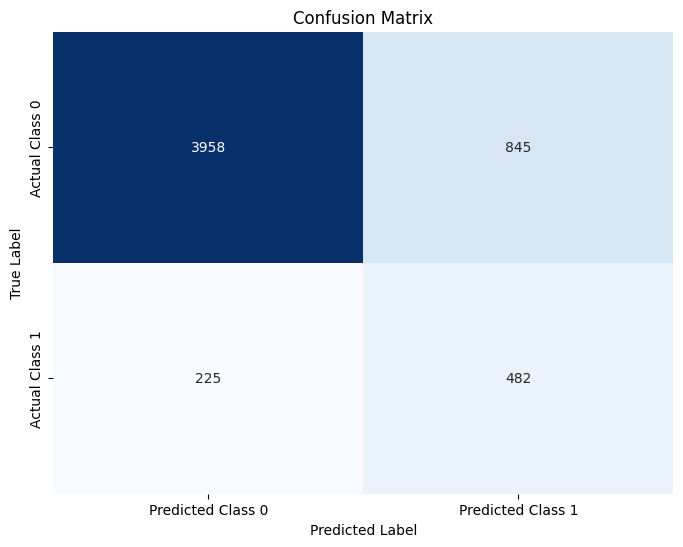

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Load datasets
train_df = pd.read_csv(r"C:\Users\BHARGAVI\Downloads\project_data\ghc_train.csv")
test_df = pd.read_csv(r"C:\Users\BHARGAVI\Downloads\project_data\ghc_test.csv")

# Replace NaN values with empty strings
train_df['text'] = train_df['text'].fillna('')
test_df['text'] = test_df['text'].fillna('')

# Extract texts and labels
X = train_df['text'].values.astype(str)
y = train_df['label'].values

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize texts
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(test_df['text'].values.astype(str))

# Pad sequences
max_len = 100  # Maximum sequence length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_val_padded = pad_sequences(X_val_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Apply Random Oversampling to balance the training data
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_padded, y_train)

# Define LSTM model with 64 neurons
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_len))
lstm_model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with oversampled data
history = lstm_model.fit(X_train_resampled, y_train_resampled, epochs=5, batch_size=64,
                         validation_data=(X_val_padded, y_val),
                         callbacks=[early_stopping])

# Evaluate LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_padded, test_df['label'].values)
lstm_y_pred = lstm_model.predict(X_test_padded)
lstm_y_pred_classes = (lstm_y_pred > 0.5).astype(int).flatten()

# Adjust threshold for classification to reduce false negatives
threshold = 0.3
lstm_y_pred_classes_adjusted = (lstm_y_pred > threshold).astype(int).flatten()

# Print classification report
lstm_report = classification_report(test_df['label'].values, lstm_y_pred_classes_adjusted, target_names=['Class 0', 'Class 1'])
print("LSTM Model Classification Report with Adjusted Threshold:\n", lstm_report)

# Print confusion matrix
lstm_conf_matrix = confusion_matrix(test_df['label'].values, lstm_y_pred_classes_adjusted)
print("Confusion Matrix:\n", lstm_conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(lstm_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Class 0', 'Predicted Class 1'],
            yticklabels=['Actual Class 0', 'Actual Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
